In [ ]:
!pip install Sastrawi
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')
from google.colab import drive, data_table
import pandas as pd
import glob
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import string

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Teks Dokumen

In [ ]:
dokumen = """1.	Stunting adalah masalah kurang gizi dan nutrisi kronis yang ditandai tinggi badan anak lebih pendek dari standar anak seusianya. Beberapa di antaranya mengalami kesulitan dalam mencapai perkembangan fisik dan kognitif yang optimal seperti lambat berbicara atau berjalan, hingga sering mengalami sakit.
2.	Penurunan gizi ini terjadi di masa pandemi bukan terjadi di masa biasa. Menteri Kesehatan Budi Gunadi Sadikin mengharapkan di masa yang normal tahun ini penurunan kasus stunting diharapkan bisa lebih tajam lagi sehingga target penurunan stunting di angka 14% di 2024 dapat tercapai.
3.	Penyebab utama dari stunting adalah kurangnya asupan nutrisi selama masa pertumbuhan anak. Banyak yang tidak menyadari bahwa tinggi pendeknya anak bisa menjadi tanda adanya masalah gizi kronis.
4.	faktor genetika memiliki pengaruh kecil terhadap kondisi kesehatan seseorang dibandingkan dengan faktor lingkungan dan pelayanan kesehatan. Biasanya, stunting mulai terjadi saat anak masih berada dalam kandungan dan terlihat saat mereka memasuki usia dua tahun.
5.	stunting merupakan ancaman utama terhadap kualitas masyarakat Indonesia. Bukan hanya mengganggu pertumbuhan fisik, anak-anak juga mengalami gangguan perkembangan otak yang akan memengaruhi kemampuan dan prestasi mereka.
6.	Bila orang tua tidak memberikan asupan gizi yang baik, maka anak bisa mengalami stunting. Selain itu, faktor ibu yang masa remaja dan kehamilannya kurang nutrisi serta masa laktasi yang kurang baik juga dapat memengaruhi pertumbuhan dan otak anak.
7.	Pihak Kementrian Kesehatan menegaskan bahwa stunting merupakan ancaman utama terhadap kualitas masyarakat Indonesia. Bukan hanya mengganggu pertumbuhan fisik, anak-anak juga mengalami gangguan perkembangan otak yang akan memengaruhi kemampuan dan prestasi mereka.
8.	Angka stunting sejalan dengan tingkat produktivitas masyarakat Indonesia. Jika ingin mencapai bonus demografi yang maksimal, maka stunting harus ditekan serendah-rendahnya.
9.	Kementerian Kesehatan pada tahun 2018 menyatakan bahwa sebanyak 3 dari 10 anak Indonesia  bertubuh  pendek. Stuntingmerupakan  ancaman  utama  terhadap  kualitas  manusia Indonesia, juga ancaman terhadap kemampuan daya saing bangsa.
10.	Kejadian  kasus  stunting  di Dunia  pada  anak  dibawah  5  tahun  mencapai  21,3%  pada tahun 2019.1Cakupan persentase balita sangat pendek dan pendek usia 0-59 bulan di Indonesia tahun 2019 adalah 12,8% dan 17,1%.
11.	Interaksi   antara   lingkungan   dan   nutrisi terutama kerawananpangan menghadirkan   dinamika   yang   menarik yang   dapat   dikaji   lebih   jauh.   Namun demikian tetap tidak mengabaikan berbagai    faktor    lain    dalam    kejadian stunting.
12.	anak-anak  yang  tinggal  di  rumah dengan lantai tanah dapat terserang penyakit  yang  menjadi  salah  satu faktor   pemicu   stunting   Sebagai contoh,   penyakit   Chagas   adalah penyakit    endemik    di    Amerika selatan dan mungkin menjadi agen penyebab kejadian stunting
13.	Stunting merupakan kejadian  yang dipengaruhi oleh berbagai faktor, beberapa  faktor  yang  telah  banyak  diteliti dan terbukti meningkatkan stunting adalah kerawanan  pangan,  kekurangan  sanitasi, lantai tanah dan paparan mikotoksin.
14.	anak yang berusia dibawah 5 tahun (Balita) merupakan masa penting bagi keberlangsungan hidup dan tumbuh kembang anak. Masa ini merupakan masa yang paling penting untuk meletakkan dasar-dasar kesehatan, mental, intelektual, spiritual, dan sosial anak di masa mendatang.
15.	Status gizi balita merupakan salah satu indikator kesehatan yang paling sensitif untuk menentukanderajat kesehatan anak disuatu negara. Balita digolongkan gizi kurang atau gizi buruk berisiko memiliki masa depanmasa depan suram karena dampak jangka panjang dari kekurangan gizi.
16.	Secara tidak langsung stunting dapat disebabkan oleh faktor ketahanan pangan keluarga, pola asuh, pelayanan kesehatan dan kesehatan lingkungan yang tidak memadai mencakup air dan sanitasi. Penyebab dasar terjadinya stunting dihubungkan dengan pendidikan, kemiskinan, sosial budaya, kebijakan pemerintah dan politik.
17.	rumah tangga yang mengkonsumsi air minum bersumber dari air ledeng dapat meningkatkan kejadian stunting pada anak dibandingkan dengan rumah tangga yang menggunakan air tangki dan sumur. Hal ini dapat terjadi apabila kualitas air ledeng yang digunakan oleh rumah tangga, tidak memenuhi syarat kualitas fisik dibandingkan dengan air tangki dan sumur.
18.	praktek buang air besar ditempat terbuka berhubungan dengan kejadian stunting pada anak balita di India. Perilaku tersebut menyebabkan pencemaran lingkungan akibat penyebaran kuman patogen dari fecal.
19.	ibu dengan tinggi badan pendek (<150 cm) berisiko lebih besar untuk memiliki anak yang stunting. Temuan ini mengindikasikan   adanya   siklus   malnutrisi   antar generasidari   ibu   ke   anak.
20.	60% usia muda pada ibu hamil beresiko tinggi terhadap timbulnya penyakit stunting. Dengan demikian dapat ditarik kesimpulan bahwa 2:3 ibu hamil yang berusia muda atau berusia 20 tahun kebawah berpotensi lebih besar dengan kejadian stunting pada anaknya.
"""

Case Folding

In [ ]:
huruf_kecil = dokumen.lower()
print(huruf_kecil)

1.	stunting adalah masalah kurang gizi dan nutrisi kronis yang ditandai tinggi badan anak lebih pendek dari standar anak seusianya. beberapa di antaranya mengalami kesulitan dalam mencapai perkembangan fisik dan kognitif yang optimal seperti lambat berbicara atau berjalan, hingga sering mengalami sakit. 
2.	penurunan gizi ini terjadi di masa pandemi bukan terjadi di masa biasa. menteri kesehatan budi gunadi sadikin mengharapkan di masa yang normal tahun ini penurunan kasus stunting diharapkan bisa lebih tajam lagi sehingga target penurunan stunting di angka 14% di 2024 dapat tercapai.
3.	penyebab utama dari stunting adalah kurangnya asupan nutrisi selama masa pertumbuhan anak. banyak yang tidak menyadari bahwa tinggi pendeknya anak bisa menjadi tanda adanya masalah gizi kronis. 
4.	faktor genetika memiliki pengaruh kecil terhadap kondisi kesehatan seseorang dibandingkan dengan faktor lingkungan dan pelayanan kesehatan. biasanya, stunting mulai terjadi saat anak masih berada dalam kandu

Remove Number

In [ ]:
dokumen = re.sub(r"\d+","", huruf_kecil)

print(dokumen)

.	stunting adalah masalah kurang gizi dan nutrisi kronis yang ditandai tinggi badan anak lebih pendek dari standar anak seusianya. beberapa di antaranya mengalami kesulitan dalam mencapai perkembangan fisik dan kognitif yang optimal seperti lambat berbicara atau berjalan, hingga sering mengalami sakit. 
.	penurunan gizi ini terjadi di masa pandemi bukan terjadi di masa biasa. menteri kesehatan budi gunadi sadikin mengharapkan di masa yang normal tahun ini penurunan kasus stunting diharapkan bisa lebih tajam lagi sehingga target penurunan stunting di angka % di  dapat tercapai.
.	penyebab utama dari stunting adalah kurangnya asupan nutrisi selama masa pertumbuhan anak. banyak yang tidak menyadari bahwa tinggi pendeknya anak bisa menjadi tanda adanya masalah gizi kronis. 
.	faktor genetika memiliki pengaruh kecil terhadap kondisi kesehatan seseorang dibandingkan dengan faktor lingkungan dan pelayanan kesehatan. biasanya, stunting mulai terjadi saat anak masih berada dalam kandungan dan t

Remove Punctuation

In [ ]:
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

for i in dokumen:
    if i in punc:
        dokumen = dokumen.replace(i, "")

print(dokumen)

	stunting adalah masalah kurang gizi dan nutrisi kronis yang ditandai tinggi badan anak lebih pendek dari standar anak seusianya beberapa di antaranya mengalami kesulitan dalam mencapai perkembangan fisik dan kognitif yang optimal seperti lambat berbicara atau berjalan hingga sering mengalami sakit 
	penurunan gizi ini terjadi di masa pandemi bukan terjadi di masa biasa menteri kesehatan budi gunadi sadikin mengharapkan di masa yang normal tahun ini penurunan kasus stunting diharapkan bisa lebih tajam lagi sehingga target penurunan stunting di angka  di  dapat tercapai
	penyebab utama dari stunting adalah kurangnya asupan nutrisi selama masa pertumbuhan anak banyak yang tidak menyadari bahwa tinggi pendeknya anak bisa menjadi tanda adanya masalah gizi kronis 
	faktor genetika memiliki pengaruh kecil terhadap kondisi kesehatan seseorang dibandingkan dengan faktor lingkungan dan pelayanan kesehatan biasanya stunting mulai terjadi saat anak masih berada dalam kandungan dan terlihat saat m

Remove White Space

In [ ]:
dokumen = dokumen.strip()

print(dokumen)

stunting adalah masalah kurang gizi dan nutrisi kronis yang ditandai tinggi badan anak lebih pendek dari standar anak seusianya beberapa di antaranya mengalami kesulitan dalam mencapai perkembangan fisik dan kognitif yang optimal seperti lambat berbicara atau berjalan hingga sering mengalami sakit 
	penurunan gizi ini terjadi di masa pandemi bukan terjadi di masa biasa menteri kesehatan budi gunadi sadikin mengharapkan di masa yang normal tahun ini penurunan kasus stunting diharapkan bisa lebih tajam lagi sehingga target penurunan stunting di angka  di  dapat tercapai
	penyebab utama dari stunting adalah kurangnya asupan nutrisi selama masa pertumbuhan anak banyak yang tidak menyadari bahwa tinggi pendeknya anak bisa menjadi tanda adanya masalah gizi kronis 
	faktor genetika memiliki pengaruh kecil terhadap kondisi kesehatan seseorang dibandingkan dengan faktor lingkungan dan pelayanan kesehatan biasanya stunting mulai terjadi saat anak masih berada dalam kandungan dan terlihat saat me

Stemming Document

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

dokumen_stemming = stemmer.stem(dokumen)
print(dokumen_stemming)

stunting adalah masalah kurang gizi dan nutrisi kronis yang tanda tinggi badan anak lebih pendek dari standar anak usia beberapa di antara alami sulit dalam capai kembang fisik dan kognitif yang optimal seperti lambat bicara atau jalan hingga sering alami sakit turun gizi ini jadi di masa pandemi bukan jadi di masa biasa menteri sehat budi gunadi sadikin harap di masa yang normal tahun ini turun kasus stunting harap bisa lebih tajam lagi sehingga target turun stunting di angka di dapat capai sebab utama dari stunting adalah kurang asupan nutrisi lama masa tumbuh anak banyak yang tidak sadar bahwa tinggi pendek anak bisa jadi tanda ada masalah gizi kronis faktor genetika milik pengaruh kecil hadap kondisi sehat orang banding dengan faktor lingkung dan layan sehat biasa stunting mulai jadi saat anak masih ada dalam kandung dan lihat saat mereka pasuk usia dua tahun stunting rupa ancam utama hadap kualitas masyarakat indonesia bukan hanya ganggu tumbuh fisik anakanak juga alami ganggu kem

Stopword Removing

In [ ]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
document_stopword = stopword.remove(dokumen_stemming)

print(document_stopword)

stunting masalah kurang gizi nutrisi kronis tanda tinggi badan anak lebih pendek standar anak usia beberapa alami sulit capai kembang fisik kognitif optimal lambat bicara jalan hingga sering alami sakit turun gizi jadi masa pandemi bukan jadi masa biasa menteri sehat budi gunadi sadikin harap masa normal tahun turun kasus stunting harap lebih tajam sehingga target turun stunting angka capai utama stunting kurang asupan nutrisi lama masa tumbuh anak banyak sadar tinggi pendek anak jadi tanda masalah gizi kronis faktor genetika milik pengaruh kecil hadap kondisi sehat orang banding faktor lingkung layan sehat biasa stunting mulai jadi anak kandung lihat pasuk usia tahun stunting rupa ancam utama hadap kualitas masyarakat indonesia bukan ganggu tumbuh fisik anakanak alami ganggu kembang otak akan pengaruh mampu prestasi bila orang tua beri asupan gizi baik anak alami stunting itu faktor ibu masa remaja hamil kurang nutrisi masa laktasi kurang baik pengaruh tumbuh otak anak pihak tri sehat

Tokenizing

['stunting', 'masalah', 'kurang', 'gizi', 'nutrisi', 'kronis', 'tanda', 'tinggi', 'badan', 'anak', 'lebih', 'pendek', 'standar', 'anak', 'usia', 'beberapa', 'alami', 'sulit', 'capai', 'kembang', 'fisik', 'kognitif', 'optimal', 'lambat', 'bicara', 'jalan', 'hingga', 'sering', 'alami', 'sakit', 'turun', 'gizi', 'jadi', 'masa', 'pandemi', 'bukan', 'jadi', 'masa', 'biasa', 'menteri', 'sehat', 'budi', 'gunadi', 'sadikin', 'harap', 'masa', 'normal', 'tahun', 'turun', 'kasus', 'stunting', 'harap', 'lebih', 'tajam', 'sehingga', 'target', 'turun', 'stunting', 'angka', 'capai', 'utama', 'stunting', 'kurang', 'asupan', 'nutrisi', 'lama', 'masa', 'tumbuh', 'anak', 'banyak', 'sadar', 'tinggi', 'pendek', 'anak', 'jadi', 'tanda', 'masalah', 'gizi', 'kronis', 'faktor', 'genetika', 'milik', 'pengaruh', 'kecil', 'hadap', 'kondisi', 'sehat', 'orang', 'banding', 'faktor', 'lingkung', 'layan', 'sehat', 'biasa', 'stunting', 'mulai', 'jadi', 'anak', 'kandung', 'lihat', 'pasuk', 'usia', 'tahun', 'stunting', '

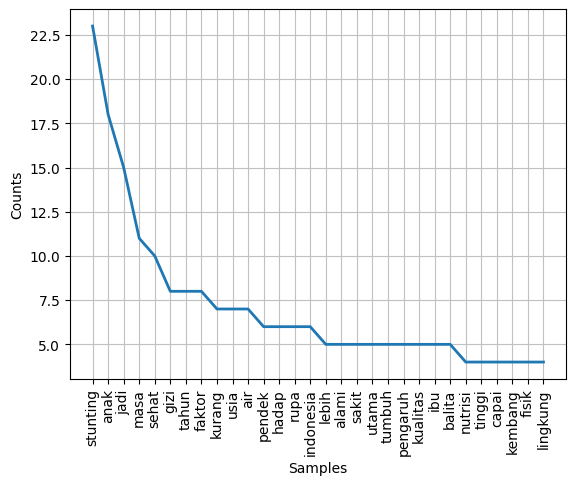

In [ ]:
document = stopword.remove(document_stopword)
tokens = nltk.tokenize.word_tokenize(document_stopword)
kemunculan = nltk.FreqDist(tokens)
print(tokens)

print(kemunculan.most_common())
kemunculan.plot(30,cumulative=False)
plt.show()

Word CLoud

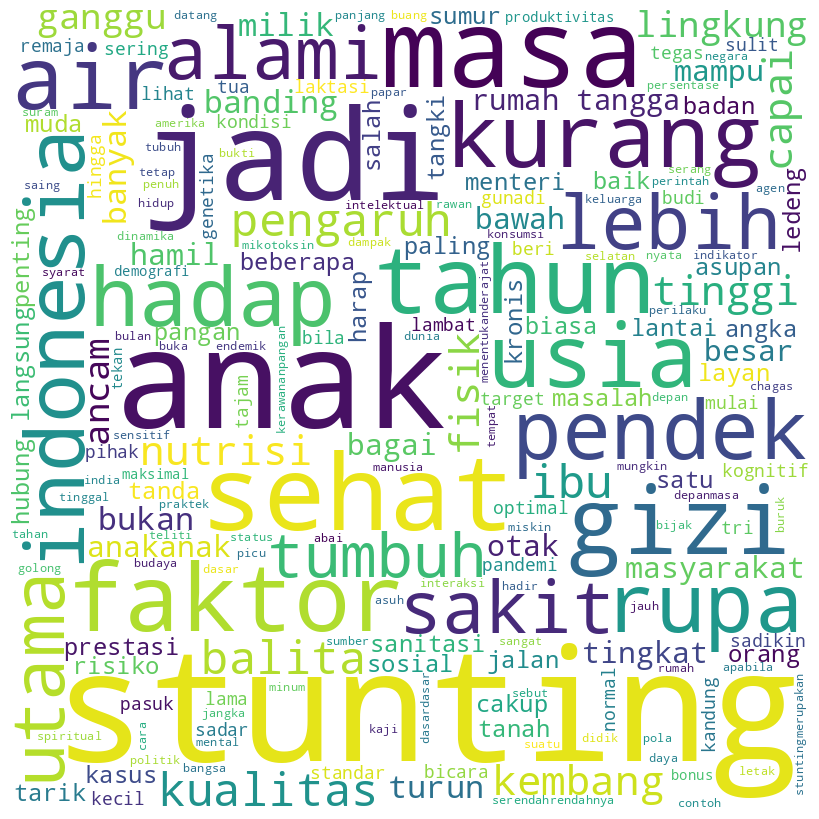

In [ ]:
wordcloud = wd(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(document)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()